# High School Academic Achievement
## English
Multiple Linear Regression, Random Forest, Support Vector Machines, Artificial Neural Network, and XDBoost





## Multiple Linear Regression

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
subject='ExactSciences'

In [426]:
df = pd.read_excel("PREPARED_ExactSciences_DS_V1.xlsx")

In [427]:
df.head()

,PermanentIncomeSupport_2,Scholarship_1,Scholarship_2,Gender_M,AcYear_12,N_NoApprovals,N_Enrollments,Computer,UnemploymentIndex,SchoolSize,N_SubjectsEnrolled,FinalMark
0,0,0,0,1,1,0,1,0,11.76,519,5,19
1,1,1,0,0,1,0,1,0,11.76,519,5,16
2,0,0,0,1,1,0,1,0,11.76,519,5,17
3,0,0,0,1,0,0,1,0,11.76,519,7,16
4,0,0,0,1,0,0,1,0,11.76,519,7,16


In [428]:
df.shape

(139005, 12)

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [430]:
l=len(df.columns)-1
X = df.iloc[:, :l]
X.columns
y = df.iloc[:, -1]
# X = X.to_numpy()
y = y.to_numpy()
y=y.reshape(-1,1)

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [432]:
sc = StandardScaler()

X_std = sc.fit(X_train)
# y_std = sc.fit(y_train.reshape(-1,1))

X_train_std = X_std.transform(X_train)
# y_train_std = y_std.transform(y_train.reshape(-1, 1))

X_test_std = X_std.transform(X_test)
# y_test_std = y_std.transform(y_test.reshape(-1, 1))

In [433]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [434]:
X_constant = sm.add_constant(X)
X_train_constant = sm.add_constant(X_train)
X_test_constant = sm.add_constant(X_test)

C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [435]:
# pd.DataFrame(X_constant)

In [436]:
OLS_rgr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [437]:
OLS_rgr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [438]:
OLS_rgr.score(X_train, y_train)

0.13357929287733994

In [439]:
OLS_rgr.coef_

array([[-1.32427733e-01, -3.70065426e-01, -6.44673599e-01,
        -4.92241972e-01,  1.99309122e+00, -1.23823377e+00,
        -3.43272233e-01, -1.91234363e-01, -2.58307520e-02,
         3.64673748e-04,  2.53765064e-01]])

In [440]:
OLS_rgr.intercept_

array([12.19585272])

In [441]:
scores = cross_val_score(OLS_rgr, X_train, y_train, cv=5, scoring= 'neg_mean_absolute_error')
scores #R^2

array([-2.43455346, -2.44553208, -2.45503022, -2.43833504, -2.42794388])

In [442]:
print("MAE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

MAE: 2.44 (+/- 0.02)


In [443]:
mae_OLS_rgr_cv = -scores.mean()
std_OLS_rgr_cv = scores.std() 

In [444]:
y_train_pred=OLS_rgr.predict(X_train)
y_test_pred=OLS_rgr.predict(X_test)

In [445]:
mse_OLS_rgr_train = metrics.mean_squared_error(y_train, y_train_pred) 
mse_OLS_rgr_test = metrics.mean_squared_error(y_test, y_test_pred)

mae_OLS_rgr_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_OLS_rgr_test = metrics.mean_absolute_error(y_test, y_test_pred)

r2_OLS_rgr_train = metrics.r2_score(y_train, y_train_pred)
r2_OLS_rgr_test = metrics.r2_score(y_test, y_test_pred)

In [446]:
columns = ['MAE_cv','std_cv','MSE_train','MSE_test', 'MAE_train','MAE_test' ,'R2_train', 'R2_test']

In [447]:
df_results= pd.DataFrame(columns=columns)

In [448]:
new_results_dic = {'MAE_cv': mae_OLS_rgr_cv ,'std_cv': std_OLS_rgr_cv,'MSE_train': mse_OLS_rgr_train,
                   'MSE_test': mse_OLS_rgr_test,'MAE_train': mae_OLS_rgr_train,
                   'MAE_test': mae_OLS_rgr_test, 'R2_train': r2_OLS_rgr_train, 'R2_test': r2_OLS_rgr_test}
df_results.loc[len(df_results)] = new_results_dic


In [449]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'OLS'}, inplace=True)
df_results.head()


,MAE_cv,std_cv,MSE_train,MSE_test,MAE_train,MAE_test,R2_train,R2_test
OLS,2.440279,0.009316,9.18721,9.163015,2.439889,2.436146,0.133579,0.137669


In [450]:
print("R2: %0.2f" % (r2_OLS_rgr_test))

R2: 0.14


In [451]:
df_y_train = pd.DataFrame()
df_y_test = pd.DataFrame()

In [452]:
df_y_train.loc[:,'OLS'] = pd.Series(y_train_pred.ravel())
df_y_train.shape

(97303, 1)

In [453]:
df_y_test.loc[:,'OLS'] = pd.Series(y_test_pred.ravel())
df_y_test.shape

(41702, 1)

In [454]:
df_y_train.head()

,OLS
0,12.620191
1,12.699633
2,12.524009
3,13.709681
4,13.430382


In [455]:
df_y_test.head()

,OLS
0,12.397605
1,11.242200
2,11.697610
3,12.481905
4,12.562590


In [456]:
OLS_model = sm.OLS(y_train, X_train_constant)
lr = OLS_model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1364.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:46:58   Log-Likelihood:            -2.4597e+05
No. Observations:               97303   AIC:                         4.920e+05
Df Residuals:                   97291   BIC:                         4.921e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.1959      0.122     99.897      0.000      11.957      12.435
PermanentIncomeSupport_2    -0.1324      0.077     -1.718      0.086      -0.283       0.019
Scholarship_1               -0.3701      0.077     -4.782      0.000      -0.522      -0.218
Scholarship_2               -0.6447      0.031    -20.616      0.000      -0.706      -0.583
Gender_M                    -0.4922      0.020    -25.174      0.000      -0.531      -0.454
AcYear_12                    1.9931      0.034     58.546      0.000       1.926       2.060
N_NoApprovals               -1.2382      0.021    -60.119      0.000      -1.279      -1.198
N_Enrollments               -0.3433      0.038     -8.940      0.000      -0.419      -0.268
Computer                    -0.1912      0.022     -8.739      0.000      -0.234      -0.148
UnemploymentIndex           -0.0258      0.004     -6.434      0.000      -0.034      -0.018
SchoolSize                   0.0004   2.55e-05     14.301      0.000       0.000       0.000
N_SubjectsEnrolled           0.2538      0.012     20.939      0.000       0.230       0.278
==============================================================================
Omnibus:                      606.083   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.942
Skew:                          -0.179   Prob(JB):                    1.62e-137
Kurtosis:                       3.165   Cond. No.                     9.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Random Forest

In [457]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [458]:
rf_rgr = RandomForestRegressor(bootstrap = True, #Best estimator
 criterion = 'mse',
 max_depth = None,
 max_features = 'auto',
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_impurity_split = None,
 min_samples_leaf = 0.001,
 min_samples_split = 0.001,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 200,
 n_jobs = None,
 oob_score = False,
 random_state = 42,
 verbose = 0,
 warm_start = False)

rf_rgr.fit(X_train_std, y_train)

C:\Users\rmendes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.001, min_samples_split=0.001,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [459]:
y_train_pred = rf_rgr.predict(X_train_std)
y_test_pred = rf_rgr.predict(X_test_std)

scores = cross_val_score(rf_rgr, X_train_std, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
 
mae_rf_rgr_cv = -scores.mean()
std_rf_rgr_cv = scores.std() 

mse_rf_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_rf_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

mae_rf_rgr_train = metrics.mean_absolute_error(y_train.ravel(), y_train_pred.ravel()) 
mae_rf_rgr_test = metrics.mean_absolute_error(y_test.ravel(), y_test_pred.ravel())

r2_rf_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_rf_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())


In [460]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))      

MSE train: 8.5932, test: 8.7500
R^2 train: 0.1896, test: 0.1765


In [461]:
new_results_dic = {'MAE_cv': mae_rf_rgr_cv ,'std_cv': std_rf_rgr_cv,'MSE_train': mse_rf_rgr_train,
                   'MSE_test': mse_rf_rgr_test,'MAE_train': mae_rf_rgr_train,
                   'MAE_test': mae_rf_rgr_test, 'R2_train': r2_rf_rgr_train, 'R2_test': r2_rf_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [462]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'RF'}, inplace=True)
df_results.head()

,MAE_cv,std_cv,MSE_train,MSE_test,MAE_train,MAE_test,R2_train,R2_test
OLS,2.440279,0.009316,9.187210,9.163015,2.439889,2.436146,0.133579,0.137669
RF,2.368176,0.011896,8.593212,8.750002,2.339825,2.363012,0.189598,0.176538


In [463]:
df_y_train.loc[:,'RF'] = pd.Series(y_train_pred)
df_y_train.shape

(97303, 2)

In [464]:
df_y_test.loc[:,'RF'] = pd.Series(y_test_pred)
df_y_test.shape

(41702, 2)

In [465]:
df_y_train.head()

,OLS,RF
0,12.620191,13.242765
1,12.699633,13.166908
2,12.524009,12.671385
3,13.709681,13.719343
4,13.430382,12.805789


In [466]:
df_y_test.head()

,OLS,RF
0,12.397605,11.804360
1,11.242200,10.752587
2,11.697610,11.998163
3,12.481905,12.223653
4,12.562590,13.310348


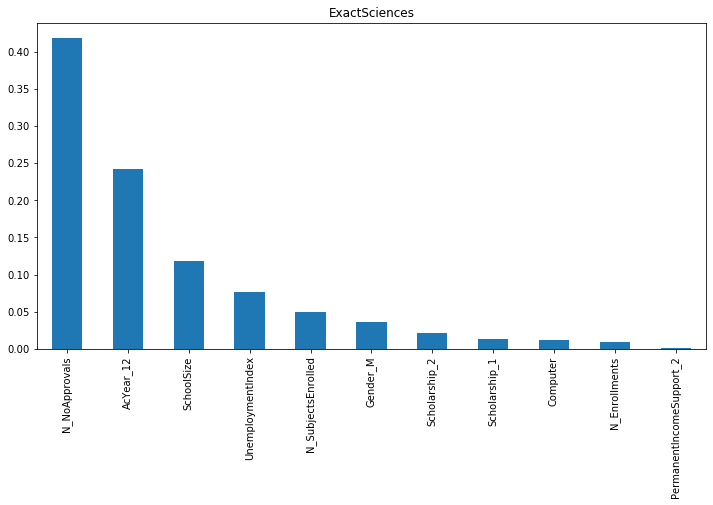

In [467]:
pd.Series(rf_rgr.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', title= subject, figsize=(12,6));

## Support Vector Machine

In [468]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
import math

In [469]:
samples_limit=7500

In [470]:
n_estimators=math.ceil(len(X_train)/samples_limit)
n_estimators

13

In [471]:
max_samples= math.floor(len(X_train)/n_estimators)
max_samples

7484

In [472]:
len(X_train)-(n_estimators*max_samples)

11

In [473]:
sv_rgr = SVR(C=1.6378937069540647, cache_size=400, coef0=0.0, degree=3, epsilon=0.2,
     gamma=0.011787686347935873, kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=True)

In [474]:
bsv_rgr = BaggingRegressor(base_estimator=sv_rgr, n_estimators=n_estimators, max_samples=max_samples,
                               max_features=1.0, bootstrap=False, bootstrap_features=False,
                               oob_score=False, warm_start=False, n_jobs=-1, random_state=42,
                               verbose=0)

In [475]:
bsv_rgr.fit(X_train_std,y_train.ravel())

BaggingRegressor(base_estimator=SVR(C=1.6378937069540647, cache_size=400,
                                    coef0=0.0, degree=3, epsilon=0.2,
                                    gamma=0.011787686347935873, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=True),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=7484, n_estimators=13, n_jobs=-1, oob_score=False,
                 random_state=42, verbose=0, warm_start=False)

In [476]:
y_train_pred = bsv_rgr.predict(X_train_std)
y_test_pred = bsv_rgr.predict(X_test_std)

scores = cross_val_score(bsv_rgr, X_train_std, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
 
mae_bsv_rgr_cv = -scores.mean()
std_bsv_rgr_cv = scores.std() 

mse_bsv_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_bsv_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

mae_bsv_rgr_train = metrics.mean_absolute_error(y_train.ravel(), y_train_pred.ravel()) 
mae_bsv_rgr_test = metrics.mean_absolute_error(y_test.ravel(), y_test_pred.ravel())

r2_bsv_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_bsv_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())



In [477]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 9.0849, test: 9.0472
R^2 train: 0.1432, test: 0.1486


In [478]:
new_results_dic = {'MAE_cv': mae_bsv_rgr_cv ,'std_cv': std_bsv_rgr_cv,'MSE_train': mse_bsv_rgr_train,
                   'MSE_test': mse_bsv_rgr_test,'MAE_train': mae_bsv_rgr_train,
                   'MAE_test': mae_bsv_rgr_test, 'R2_train': r2_bsv_rgr_train, 'R2_test': r2_bsv_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [479]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'BSV'}, inplace=True)
df_results.head()

,MAE_cv,std_cv,MSE_train,MSE_test,MAE_train,MAE_test,R2_train,R2_test
OLS,2.440279,0.009316,9.187210,9.163015,2.439889,2.436146,0.133579,0.137669
RF,2.368176,0.011896,8.593212,8.750002,2.339825,2.363012,0.189598,0.176538
BSV,2.402379,0.011579,9.084917,9.047165,2.401104,2.397122,0.143226,0.148572


In [480]:
df_y_train.loc[:,'BSV'] = pd.Series(y_train_pred)
df_y_train.shape

(97303, 3)

In [481]:
df_y_test.loc[:,'BSV'] = pd.Series(y_test_pred)
df_y_test.shape

(41702, 3)

In [482]:
df_y_train.head()

,OLS,RF,BSV
0,12.620191,13.242765,12.534775
1,12.699633,13.166908,12.260431
2,12.524009,12.671385,12.475266
3,13.709681,13.719343,14.113602
4,13.430382,12.805789,13.369796


In [483]:
df_y_test.head()

,OLS,RF,BSV
0,12.397605,11.804360,12.018406
1,11.242200,10.752587,10.727977
2,11.697610,11.998163,11.310787
3,12.481905,12.223653,12.251571
4,12.562590,13.310348,12.363082


# Multilayer Perceptron

In [484]:
from sklearn.neural_network import MLPRegressor
from itertools import product

In [485]:
mlp_rgr=MLPRegressor(activation= 'logistic',
 alpha = 0.1,
 hidden_layer_sizes = (14, 5),
 learning_rate_init = 0.005,
 random_state = 42)

In [486]:
mlp_rgr.fit(X_train_std,y_train.ravel())

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(14, 5), learning_rate='constant',
             learning_rate_init=0.005, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [487]:
y_train_pred = mlp_rgr.predict(X_train_std)
y_test_pred = mlp_rgr.predict(X_test_std)

scores = cross_val_score(mlp_rgr, X_train_std, y_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
 
mae_mlp_rgr_cv = -scores.mean()
std_mlp_rgr_cv = scores.std() 

mse_mlp_rgr_train = metrics.mean_squared_error(y_train.ravel(), y_train_pred.ravel()) 
mse_mlp_rgr_test = metrics.mean_squared_error(y_test.ravel(), y_test_pred.ravel())

mae_mlp_rgr_train = metrics.mean_absolute_error(y_train.ravel(), y_train_pred.ravel()) 
mae_mlp_rgr_test = metrics.mean_absolute_error(y_test.ravel(), y_test_pred.ravel())

r2_mlp_rgr_train = metrics.r2_score(y_train.ravel(), y_train_pred.ravel())
r2_mlp_rgr_test = metrics.r2_score(y_test.ravel(), y_test_pred.ravel())

In [488]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(y_train, y_train_pred), 
            mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred))) 

MSE train: 8.9888, test: 8.9648
R^2 train: 0.1523, test: 0.1563


In [489]:
new_results_dic = {'MAE_cv': mae_mlp_rgr_cv ,'std_cv': std_mlp_rgr_cv,'MSE_train': mse_mlp_rgr_train,
                   'MSE_test': mse_mlp_rgr_test,'MAE_train': mae_mlp_rgr_train,
                   'MAE_test': mae_mlp_rgr_test, 'R2_train': r2_mlp_rgr_train, 'R2_test': r2_mlp_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [490]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'NN'}, inplace=True)
df_results.head()

,MAE_cv,std_cv,MSE_train,MSE_test,MAE_train,MAE_test,R2_train,R2_test
OLS,2.440279,0.009316,9.187210,9.163015,2.439889,2.436146,0.133579,0.137669
RF,2.368176,0.011896,8.593212,8.750002,2.339825,2.363012,0.189598,0.176538
BSV,2.402379,0.011579,9.084917,9.047165,2.401104,2.397122,0.143226,0.148572
NN,2.399772,0.010152,8.988805,8.964754,2.398000,2.395309,0.152290,0.156328


In [491]:
df_y_train.loc[:,'NN'] = pd.Series(y_train_pred)
df_y_train.shape

(97303, 4)

In [492]:
df_y_test.loc[:,'NN'] = pd.Series(y_test_pred)
df_y_test.shape

(41702, 4)

In [493]:
df_y_train.head()

,OLS,RF,BSV,NN
0,12.620191,13.242765,12.534775,12.897756
1,12.699633,13.166908,12.260431,12.764988
2,12.524009,12.671385,12.475266,12.887505
3,13.709681,13.719343,14.113602,13.867310
4,13.430382,12.805789,13.369796,13.468286


In [494]:
df_y_test.head()

,OLS,RF,BSV,NN
0,12.397605,11.804360,12.018406,12.268544
1,11.242200,10.752587,10.727977,10.903086
2,11.697610,11.998163,11.310787,11.309568
3,12.481905,12.223653,12.251571,12.271489
4,12.562590,13.310348,12.363082,12.386617


In [495]:
df_y_train.loc[:,'Y'] = pd.Series(y_train.ravel())
df_y_train.shape

(97303, 5)

In [496]:
df_y_test.loc[:,'Y'] = pd.Series(y_test.ravel())
df_y_test.shape

(41702, 5)

In [497]:
df_y_train.head()

,OLS,RF,BSV,NN,Y
0,12.620191,13.242765,12.534775,12.897756,10
1,12.699633,13.166908,12.260431,12.764988,10
2,12.524009,12.671385,12.475266,12.887505,11
3,13.709681,13.719343,14.113602,13.867310,10
4,13.430382,12.805789,13.369796,13.468286,13


In [498]:
df_y_test.head()

,OLS,RF,BSV,NN,Y
0,12.397605,11.804360,12.018406,12.268544,13
1,11.242200,10.752587,10.727977,10.903086,13
2,11.697610,11.998163,11.310787,11.309568,10
3,12.481905,12.223653,12.251571,12.271489,11
4,12.562590,13.310348,12.363082,12.386617,18


In [499]:
corr= df_y_train.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,OLS,RF,BSV,NN,Y
OLS,1,0.88,0.95,0.94,0.37
RF,0.88,1,0.92,0.94,0.44
BSV,0.95,0.92,1,0.98,0.38
NN,0.94,0.94,0.98,1,0.39
Y,0.37,0.44,0.38,0.39,1


In [500]:
corr= df_y_test.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,OLS,RF,BSV,NN,Y
OLS,1,0.88,0.95,0.94,0.37
RF,0.88,1,0.92,0.94,0.42
BSV,0.95,0.92,1,0.98,0.39
NN,0.94,0.94,0.98,1,0.4
Y,0.37,0.42,0.39,0.4,1


In [501]:
corrXGB=df_y_train.drop('Y', 1).corr()
corrXGB.style.background_gradient(cmap='coolwarm', axis=None)
corrXGB.style.background_gradient(cmap='coolwarm').set_precision(2)

,OLS,RF,BSV,NN
OLS,1,0.88,0.95,0.94
RF,0.88,1,0.92,0.94
BSV,0.95,0.92,1,0.98
NN,0.94,0.94,0.98,1


In [502]:
np.linalg.det(corrXGB)

0.0004947926809609883

## XGBoost from models outputs

In [503]:
df_y = pd.concat([df_y_train, df_y_test], axis=0)

In [504]:
df_y.head()

,OLS,RF,BSV,NN,Y
0,12.620191,13.242765,12.534775,12.897756,10
1,12.699633,13.166908,12.260431,12.764988,10
2,12.524009,12.671385,12.475266,12.887505,11
3,13.709681,13.719343,14.113602,13.867310,10
4,13.430382,12.805789,13.369796,13.468286,13


In [505]:
df_y.shape

(139005, 5)

In [506]:
l=df_y.shape[1]-1
XY = df_y.iloc[:, :l]
XY.columns
yy = df_y.iloc[:, -1]
yy = yy.to_numpy()
yy=yy.reshape(-1,1)

In [507]:
len(XY.T)

4

In [508]:
yy_train= yy[0:df_y_train.shape[0]]
yy_test=yy[df_y_train.shape[0]:]

In [509]:
len(yy_train)

97303

In [510]:
len(yy_test)

41702

In [511]:
XY_train=XY.iloc[0:df_y_train.shape[0],:]
XY_test=XY.iloc[df_y_train.shape[0]:,:]

In [512]:
XY_train.shape

(97303, 4)

In [513]:
XY_test.shape

(41702, 4)

In [514]:
XY_std = sc.fit(XY_train)

In [515]:
XY_train_std = XY_std.transform(XY_train)
XY_test_std = XY_std.transform(XY_test)

In [516]:
from sklearn.decomposition import PCA

In [517]:
pca_train = PCA()
pca_train.fit(XY_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [518]:
print(np.round(pca_train.explained_variance_ratio_,2))

[0.95 0.03 0.01 0.  ]


In [519]:
pca_train = PCA(n_components=4, random_state=42)
pca_train.fit(XY_train_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [520]:
pca_XY_train = pca_train.transform(XY_train_std)
PCAXY_train = pd.DataFrame(data = pca_XY_train
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCAXY_train.head()

,PC1,PC2,PC3,PC4
0,0.413820,0.395441,-0.065334,-0.085852
1,0.563674,0.352222,-0.238409,-0.159302
2,0.690447,0.113395,0.109444,-0.158802
3,-1.188847,-0.085979,0.159572,0.138344
4,-0.300583,-0.380472,0.127508,-0.078605


In [521]:
pca_XY_test = pca_train.transform(XY_test_std)
PCAXY_test = pd.DataFrame(data = pca_XY_test
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCAXY_test.head()

,PC1,PC2,PC3,PC4
0,1.476638,-0.271948,0.011093,-0.113101
1,3.365746,-0.143153,-0.062684,-0.021820
2,2.339387,0.285773,-0.269497,0.132583
3,1.198643,-0.099975,-0.055472,0.036578
4,0.678205,0.486981,-0.299086,0.126329


In [522]:
import xgboost as xgb

In [523]:
xgb_rgr = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=481,
                           verbosity=1, objective='reg:squarederror',
                           booster='gbtree', n_jobs=-1, gamma=0,
                           min_child_weight=274, max_delta_step=0, subsample=0.9,
                           colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
                           reg_alpha=0, reg_lambda=15, scale_pos_weight=1, base_score=0.5,
                           random_state=42, seed=None, missing=None, importance_type='gain')

In [524]:
pipeline = Pipeline([('std', XY_std), ('pca', pca_train), ('xgb', xgb_rgr)])

In [525]:
pipeline.fit(XY_train,yy_train.ravel())

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=4,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.01,
                              max_delta_step=0, max_depth=4,
                              min_child_weight=274, missing=None,
                              n_estimators=481, n_jobs=-1, nthread=None,
                              objective='reg:squarederror', random_state=42,
                              reg_alpha=0, reg_lambda=15, scale_pos_weight=1,
                              see

In [526]:
#yy_train_pred = xgb_rgr.predict(PCAXY_train)
#yy_test_pred = xgb_rgr.predict(PCAXY_test)
yy_train_pred = pipeline.predict(XY_train)
yy_test_pred = pipeline.predict(XY_test)

scores = cross_val_score(pipeline, XY_train, yy_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
 
mae_xgb_rgr_cv = -scores.mean()
std_xgb_rgr_cv = scores.std() 

mse_xgb_rgr_train = metrics.mean_squared_error(yy_train.ravel(), yy_train_pred.ravel()) 
mse_xgb_rgr_test = metrics.mean_squared_error(yy_test.ravel(), yy_test_pred.ravel())

mae_xgb_rgr_train = metrics.mean_absolute_error(yy_train.ravel(), yy_train_pred.ravel()) 
mae_xgb_rgr_test = metrics.mean_absolute_error(yy_test.ravel(), yy_test_pred.ravel())


r2_xgb_rgr_train = metrics.r2_score(yy_train.ravel(), yy_train_pred.ravel())
r2_xgb_rgr_test = metrics.r2_score(yy_test.ravel(), yy_test_pred.ravel())

In [527]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
       format(mean_squared_error(yy_train, yy_train_pred), 
            mean_squared_error(yy_test, yy_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(yy_train, yy_train_pred),
             r2_score(yy_test, yy_test_pred))) 

MSE train: 8.5048, test: 8.7788
R^2 train: 0.1979, test: 0.1738


In [528]:
new_results_dic = {'MAE_cv': mae_xgb_rgr_cv ,'std_cv': std_xgb_rgr_cv,'MSE_train': mse_xgb_rgr_train,
                   'MSE_test': mse_xgb_rgr_test, 'MAE_train': mae_xgb_rgr_train,
                   'MAE_test': mae_xgb_rgr_test, 'R2_train': r2_xgb_rgr_train, 'R2_test': r2_xgb_rgr_test}
df_results.loc[len(df_results)] = new_results_dic

In [529]:
indexNamesArr = df_results.index.values
i = indexNamesArr[-1]
df_results.rename(index={i:'XGB'}, inplace=True)
df_results.head(10)

,MAE_cv,std_cv,MSE_train,MSE_test,MAE_train,MAE_test,R2_train,R2_test
OLS,2.440279,0.009316,9.187210,9.163015,2.439889,2.436146,0.133579,0.137669
RF,2.368176,0.011896,8.593212,8.750002,2.339825,2.363012,0.189598,0.176538
BSV,2.402379,0.011579,9.084917,9.047165,2.401104,2.397122,0.143226,0.148572
NN,2.399772,0.010152,8.988805,8.964754,2.398000,2.395309,0.152290,0.156328
XGB,2.332000,0.011829,8.504752,8.778823,2.324447,2.364377,0.197940,0.173826


In [530]:
# df_results.to_excel('Outputs.xlsx', sheet_name='English')

with pd.ExcelWriter('Outputs.xlsx',engine='openpyxl', mode='a') as writer:
     df_results.to_excel(writer, sheet_name=subject)